In [51]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.display.max_columns = 30
import pandas as pd
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [52]:
training_data = pd.read_csv("TRAINING-FINAL_25Jan2022.csv",sep=',',header=0)
testing_data = pd.read_csv("TESTING-FINAL_25Jan2022.csv",sep=',',header=0)
len(training_data)

884

In [53]:
# For training Data
bins = [0,15,35,55,96]
labels=[0,1,2,3]
training_data['Age_bins'] = pd.cut(training_data['Age'], bins=bins, labels=labels, include_lowest=True)
print (training_data)

       Encounter  Gender_Female  Gender_Male  Race_African American  or Black  \
0       57304086              1            0                                0   
1       59464001              0            1                                0   
2      306885119              1            0                                1   
3      843895334              1            0                                1   
4      964184337              0            1                                1   
..           ...            ...          ...                              ...   
879  43280473142              0            1                                1   
880  43600834323              0            1                                0   
881  44604273292              0            1                                1   
882  46328314129              0            1                                0   
883  46642834260              1            0                                0   

     Race_American Indian o

In [54]:
# For Testing Data
bins = [0,15,35,55,96]
labels=[0,1,2,3]
testing_data['Age_bins'] = pd.cut(testing_data['Age'], bins=bins, labels=labels, include_lowest=True)
print (testing_data)

      Encounter  Gender_Female  Gender_Male  Race_African American  or Black  \
0     892774098              1            0                                1   
1    1930374269              0            1                                1   
2    9446413161              0            1                                0   
3   13728583178              1            0                                0   
4   14848513300              0            1                                0   
..          ...            ...          ...                              ...   
75   5394323197              0            1                                0   
76   9708665343              1            0                                1   
77  12060044116              0            1                                0   
78  12341515134              0            1                                0   
79  12377103213              1            0                                1   

    Race_American Indian or Alaskan Nat

In [55]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

training_data = clean_dataset(training_data)
testing_data = clean_dataset(testing_data)
print (training_data)

        Encounter  Gender_Female  Gender_Male  \
0    5.730409e+07            1.0          0.0   
1    5.946400e+07            0.0          1.0   
2    3.068851e+08            1.0          0.0   
3    8.438953e+08            1.0          0.0   
4    9.641843e+08            0.0          1.0   
..            ...            ...          ...   
879  4.328047e+10            0.0          1.0   
880  4.360083e+10            0.0          1.0   
881  4.460427e+10            0.0          1.0   
882  4.632831e+10            0.0          1.0   
883  4.664283e+10            1.0          0.0   

     Race_African American  or Black  Race_American Indian or Alaskan Native  \
0                                0.0                                     0.0   
1                                0.0                                     0.0   
2                                1.0                                     0.0   
3                                1.0                                     0.0   
4          

In [56]:
# Save fresh "training_data" and "testing_data" data after cleaning
#training_data.to_csv("3_cleaned_training_testing_data_after_scoring/training_data.csv")
#testing_data.to_csv("3_cleaned_training_testing_data_after_scoring/testing_data.csv")

In [57]:
X_train = training_data[['Gender_Female','Gender_Male','Race_African American  or Black','Race_American Indian or Alaskan Native','Race_Asian','Race_Caucasian or White','Race_Hispanic','Race_Multiple','Race_Unknown', 'Ethnic Group_Hispanic or Latino','Ethnic Group_Non-Hispanic or Latino','Ethnic Group_Not Recorded','Ethnic Group_Unknown~Non-Hispanic','Ethnic Group_Unknown','Age_bins', 'Reason1','Reason2','Reason3','Reason4','Reason5','Reason6',
        'Reason7','Reason8','Reason9','Reason10','Reason11','Reason12', 'Reason13','Reason14','Reason15','Reason16',
         'Reason17','Reason18', 'Reason19','Reason20']]
#X_train = training_data[['Gender','Race','Ethnic Group','Age_bins']]
y_train = training_data['Class']
X_test = testing_data[['Gender_Female','Gender_Male','Race_African American  or Black','Race_American Indian or Alaskan Native','Race_Asian','Race_Caucasian or White','Race_Hispanic','Race_Multiple','Race_Unknown', 'Ethnic Group_Hispanic or Latino','Ethnic Group_Non-Hispanic or Latino','Ethnic Group_Not Recorded','Ethnic Group_Unknown~Non-Hispanic','Ethnic Group_Unknown','Age_bins', 'Reason1','Reason2','Reason3','Reason4','Reason5','Reason6',
        'Reason7','Reason8','Reason9','Reason10','Reason11','Reason12', 'Reason13','Reason14','Reason15','Reason16',
         'Reason17','Reason18', 'Reason19','Reason20']]
#X_test = testing_data[['Gender','Race','Ethnic Group','Age_bins']]
y_test = testing_data['Class']

In [58]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=30, random_state=391),
    LinearSVC(),
    LogisticRegression(random_state=45)]

# 10 fold Cross-validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [59]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.535700,0.053710
LogisticRegression,0.542441,0.049618
RandomForestClassifier,0.752962,0.072465


# Box Plot

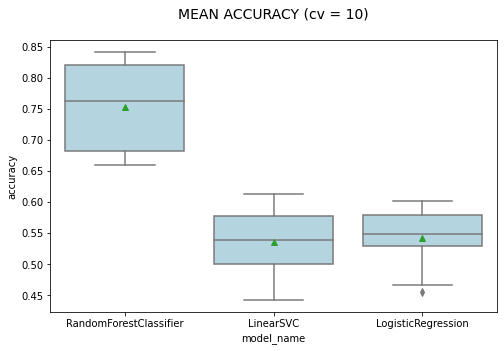

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 10)\n", size=14);

In [61]:
# Save raw results Box Plot
cv_df.to_csv("Sensor_data_demographic_comorbidity_box_plot.csv")

In [62]:
#model = LinearSVC()
#model = LogisticRegression(random_state=45)
model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.])

# Confusion Matrix

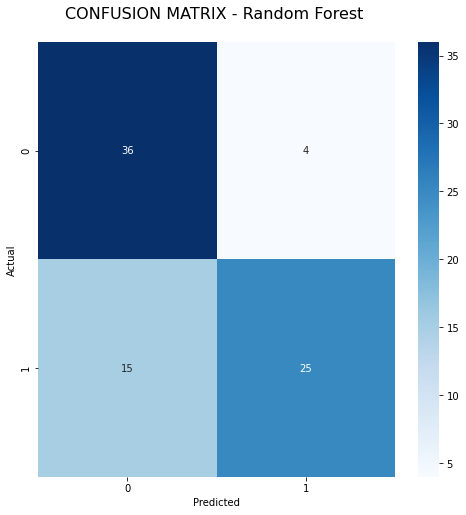

In [63]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
#plt.title("CONFUSION MATRIX - Logistic Regression\n", size=16);
plt.title("CONFUSION MATRIX - Random Forest \n", size=16);

In [64]:
# Save raw results Confusion Matrix
conf_scores_csv = pd.DataFrame({"y_test" : y_test, "y_pred" : y_pred})
conf_scores_csv.to_csv("Sensor_data_classification_demographic_comorbidity.csv", index=False)

# Classification Report

In [65]:
from sklearn.metrics import classification_report
target_names = ['Sepsis', 'NonSepsis']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Sepsis       0.71      0.90      0.79        40
   NonSepsis       0.86      0.62      0.72        40

    accuracy                           0.76        80
   macro avg       0.78      0.76      0.76        80
weighted avg       0.78      0.76      0.76        80



In [69]:
# For Random Forest and Logistoc Regression
Pred_score = model.predict_proba(X_train)
len(Pred_score)
res = pd.DataFrame(Pred_score)
res.index = X_train.index # its important for comparison
res.columns = ["Sepsis","Non-Sepsis"]
res.to_csv("Sensor_data_Train_scores_demographic_comorbidity.csv")
#res.to_csv("lateFusion_results_4hr_36000samples_1Dec.csv")

In [70]:
# For Random Forest and Logistoc Regression
Pred_score = model.predict_proba(X_test)
len(Pred_score)
res = pd.DataFrame(Pred_score)
res.index = X_test.index # its important for comparison
res.columns = ["Sepsis","Non-Sepsis"]
res.to_csv("Sensor_data_Test_scores_demographic_comorbidity.csv")
#res.to_csv("lateFusion_results_4hr_36000samples_1Dec.csv")

In [71]:
#For Linear SVC
from sklearn import svm
clf=svm.LinearSVC()
clf.fit(X_train, y_train)
Pred_score= clf._predict_proba_lr(X_test)
print(len(Pred_score))
res = pd.DataFrame(Pred_score)
res.index = X_test.index # its important for comparison
res.columns = ["Sepsis_monjoy","Non-Sepsis_monjoy"]
res.to_csv("lateFusion_results_6hr_17Dec.csv")
#res.to_csv("lateFusion_results_4hr_9000samples_1Dec.csv")

80
